In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jlukasik (dct-activation). Use `wandb login --relogin` to force relogin


True

In [5]:
project = 'zc_combine_rob'
# project_proxy = 'zc_combine_rob_nb201_proxy_only'


#check 10-11-2023-20-12-07-714501 
api = wandb.Api(timeout=19)
runs = api.runs('dct-activation' + "/" + project)
# runs_proxy = api.runs('dct-activation' + "/" + project_proxy)

print(len(runs))

7554


In [3]:
for run in runs:
    # skip xgb for now
    if run.config['model'] != 'rf':
        continue
    
    print(run.summary['corr_mean'])
    print(run.config)
    break

0.8869528727279178
{'cfg': '../zc_combine/configs/nb201_full.json', 'meta': '../data/robustness-dataset/meta.json', 'seed': 42, 'model': 'rf', 'proxy': 'jacov', 'attack': 'aa_square@Linf', 'dataset': 'cifar10', 'n_evals': 10, 'features': None, 'benchmark': 'nb201', 'data_seed': 46, 'eps_attack': '1.0', 'out_prefix': 'train_-479', 'train_size': 1000, 'version_key': '1', 'keep_uniques': True, 'use_features': True, 'multi_objective': True, 'use_all_proxies': False, 'robustness_evals': True, 'use_flops_params': True, 'zero_unreachables': True, 'robustness_data_path': '../data/robustness-dataset/'}


In [16]:
runs[590].name


'10-11-2023-20-12-07-714501'

In [16]:
import pandas as pd

def create_entry(run, i):
    try:
        # TODO uncertainty
        row = {}
        cfg_args = ['cfg', 'data_seed', 'proxy', 'train_size', 'use_all_proxies', 'use_features', 'attack', 'multi_objective', "eps_attack"]
        for ca in cfg_args:
            row[ca] = run.config[ca]

        prox, cfg = row['proxy'], row['cfg']
        row['proxy'] = '' if prox is None or not len(prox) else prox
        row['cfg'] = '' if cfg is None or not len(cfg) else cfg
        row['corr'] = run.summary['corr_mean']
        row['tau'] = run.summary['tau_mean']
    except:
        print(i)
    return row

df = [create_entry(r,i) for i,r in enumerate(runs)]
# df_proxy = [create_entry(r) for r in runs_proxy]
df = pd.DataFrame(df)
# df_proxy = pd.DataFrame(df_proxy)
# df = pd.concat([df, df_proxy], ignore_index=True)
df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,cfg,data_seed,proxy,train_size,use_all_proxies,use_features,attack,multi_objective,eps_attack,corr,tau
0,../zc_combine/configs/nb201_full.json,46,jacov,1000,False,True,aa_square@Linf,True,4.0,NaN,NaN
1,../zc_combine/configs/nb201_full.json,46,jacov,1000,False,True,aa_square@Linf,True,0.5,NaN,NaN
2,../zc_combine/configs/nb201_full.json,46,jacov,1000,False,True,aa_apgd-ce@Linf,True,4.0,NaN,NaN
3,../zc_combine/configs/nb201_full.json,46,jacov,1000,False,True,aa_apgd-ce@Linf,True,0.5,NaN,NaN
4,../zc_combine/configs/nb201_full.json,46,jacov,1000,False,True,pgd@Linf,True,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7549,,42,,20,True,False,pgd@Linf,True,1.0,0.668644,0.507483
7550,../zc_combine/configs/nb201_first.json,42,,20,True,True,pgd@Linf,False,1.0,0.520854,0.367915
7551,,42,,20,True,False,fgsm@Linf,True,1.0,0.841519,0.657233
7552,../zc_combine/configs/nb201_first.json,42,,20,True,True,fgsm@Linf,True,1.0,0.839272,0.654184


In [17]:
df_all = df

In [3]:
df = df.dropna()


NameError: name 'df' is not defined

In [55]:
df['cfg'] == "NONE"

912     False
913     False
914     False
915     False
916     False
        ...  
7549    False
7550    False
7551    False
7552    False
7553    False
Name: cfg, Length: 6634, dtype: bool

In [69]:
what_cfg = 'first'
group_cols = ['train_size', 'use_all_proxies', 'use_features', 'proxy', 'attack','multi_objective', 'eps_attack']


# small_df= df[(df['cfg'].str.contains('NONE')) | (df['cfg'].str.contains(what_cfg))].drop(columns='cfg')

# small_df.groupby(group_cols).mean()

In [2]:
df[df['eps_attack'] == '0.5']

NameError: name 'df' is not defined

In [33]:
plot_df = df.copy()
plot_df['use_all_proxies'] = df['use_all_proxies'].map(lambda x: 'All Proxies' if x else '')
if 'pca' in project:
    plot_df['threshold'] = df['threshold'].map(lambda x: 'N' if pd.isna(x) else str(x))
    plot_df['nfeatures'] = df['nfeatures'].map(lambda x: 'N' if pd.isna(x) else str(x))
    plot_df['attack'] = df['attack']
    plot_df['multi_objective'] = df['multi_objective'].map(lambda x: 'multi' if x else 'single')
    plot_df['plot_col'] = plot_df[['proxy', 'use_all_proxies', 'threshold', 'nfeatures', 'attack', 'multi_objective']].agg(', '.join, axis=1)
else:
    plot_df['use_features'] = df['use_features'].map(lambda x: 'Features' if x else 'No Features')
    plot_df['attack'] = df['attack']
    plot_df['multi_objective'] = df['multi_objective'].map(lambda x: 'multi' if x else 'single')
    plot_df['plot_col'] = plot_df[['proxy', 'use_all_proxies', 'use_features', 'attack', 'multi_objective']].agg(', '.join, axis=1)

plot_df['plot_col']

0           jacov, , Features, aa_square@Linf, multi
1          jacov, , Features, aa_apgd-ce@Linf, multi
2                 jacov, , Features, pgd@Linf, multi
3                jacov, , Features, fgsm@Linf, multi
4          fisher, , Features, aa_square@Linf, multi
                            ...                     
1075     , All Proxies, No Features, pgd@Linf, multi
1076       , All Proxies, Features, pgd@Linf, single
1077    , All Proxies, No Features, fgsm@Linf, multi
1078       , All Proxies, Features, fgsm@Linf, multi
1079      , All Proxies, Features, fgsm@Linf, single
Name: plot_col, Length: 1079, dtype: object

/home/jl789093/.conda/envs/zc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jl789093/.conda/envs/zc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jl789093/.conda/envs/zc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


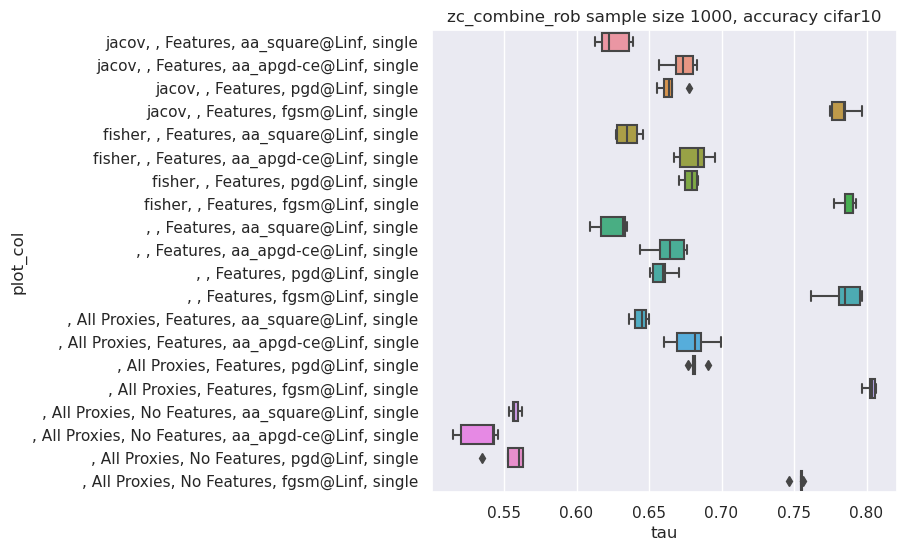

In [36]:
sns.set()

tsize = 1000
plt.figure(figsize=(6, 6))
sns.boxplot(data=plot_df[(plot_df['train_size'] == tsize) & (plot_df['multi_objective'] == 'single')  & ~(plot_df['cfg'].str.contains('first'))], y='plot_col', x='tau')
plt.title(f"{project} sample size {tsize}, accuracy cifar10")
if 'pca' not in project:
    plt.savefig(f'figs/{project}_boxes_{tsize}.png')
#plt.ylim(0.70, 0.78)
plt.show()

/home/jl789093/.conda/envs/zc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jl789093/.conda/envs/zc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jl789093/.conda/envs/zc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


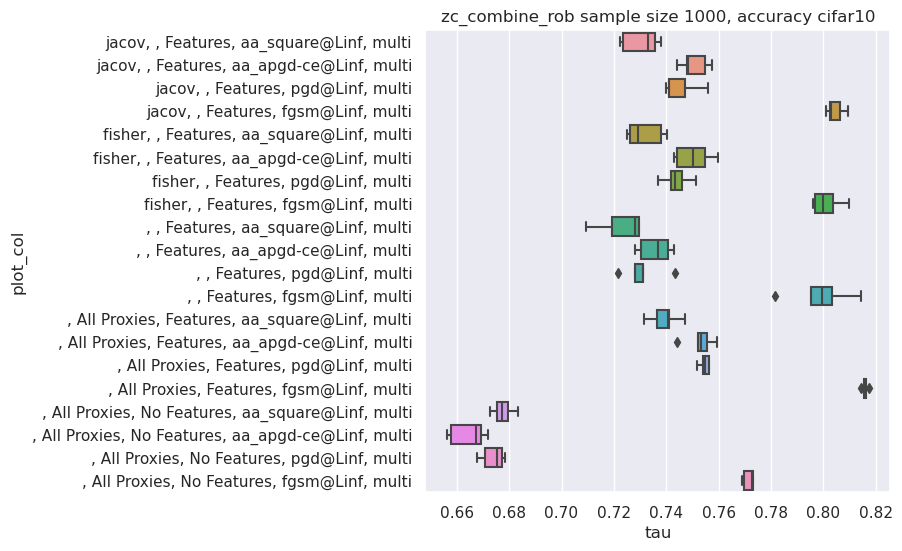

In [40]:
sns.set()

tsize = 1000
plt.figure(figsize=(6, 6))
sns.boxplot(data=plot_df[(plot_df['train_size'] == tsize) & (plot_df['multi_objective'] == 'multi')  & ~(plot_df['cfg'].str.contains('first'))], y='plot_col', x='tau')
plt.title(f"{project} sample size {tsize}, accuracy cifar10")
if 'pca' not in project:
    plt.savefig(f'figs/{project}_boxes_{tsize}.png')
#plt.ylim(0.70, 0.78)
plt.show()